In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB, GaussianNB, BernoulliNB, MultinomialNB
from sklearn import metrics

### Asignamos los nombres de cada columna del conjunto de datos.

In [2]:
df = pd.read_csv('breast-cancer-wisconsin.data', names = ['Código de la muestra','Grosor del Tumor', "Uniformidad del tamaño de la célula", "Uniformidad de la forma de la célula", "Adhesión marginal", "Tamaño de célula epitelial", "Núcleos desnudos", "Cromatina blanda", "Nucléolos normales", "Mitosis de células", "Clase"])

In [3]:
df

,Código de la muestra,Grosor del Tumor,Uniformidad del tamaño de la célula,Uniformidad de la forma de la célula,Adhesión marginal,Tamaño de célula epitelial,Núcleos desnudos,Cromatina blanda,Nucléolos normales,Mitosis de células,Clase
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


### Encontramos los 16 registros incompletos.

In [4]:
codigos = []
for i in range(df.shape[0]):
    if not df.iloc[i, :].str.isnumeric().all():
        codigos += [df.iloc[i, 0]]
df_incompletos = df[df['Código de la muestra'].isin(codigos)]
df_incompletos

,Código de la muestra,Grosor del Tumor,Uniformidad del tamaño de la célula,Uniformidad de la forma de la célula,Adhesión marginal,Tamaño de célula epitelial,Núcleos desnudos,Cromatina blanda,Nucléolos normales,Mitosis de células,Clase
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


### Obtenemos un dataframe sin los registros incompletos, para entrenar nuestros modelos sobre éste.

In [5]:
df_completos = df[~df['Código de la muestra'].isin(df_incompletos.iloc[:, 0])]
df_completos

,Código de la muestra,Grosor del Tumor,Uniformidad del tamaño de la célula,Uniformidad de la forma de la célula,Adhesión marginal,Tamaño de célula epitelial,Núcleos desnudos,Cromatina blanda,Nucléolos normales,Mitosis de células,Clase
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


### Revisamos el número de valores distintos que puede tomar cada atributo

In [6]:
df_completos.nunique()

Código de la muestra                    629
Grosor del Tumor                         10
Uniformidad del tamaño de la célula      10
Uniformidad de la forma de la célula     10
Adhesión marginal                        10
Tamaño de célula epitelial               10
Núcleos desnudos                         10
Cromatina blanda                         10
Nucléolos normales                       10
Mitosis de células                        9
Clase                                     2
dtype: int64

### Sabemos que el código de la muestra no es una variable importante para el modelo, ya que únicamente es un identificador único para distinguir cada ejemplo, por lo tanto quitamos esa columna

In [7]:
df_completos = df_completos.drop(axis = 1, labels = ['Código de la muestra'])

### Separamos nuestros datos en entrenamiento, prueba y validación.

In [8]:
X = df_completos.iloc[:, :-1]
y = df_completos.iloc[:, -1]
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=0)

### Vamos a utilizar cuatro modelos, asumiendo cuatro distribuciones de probabilidad distintas
### Categórica: Se utiliza esta distribución por el número de valores distintos que toma cada variable, cada valor distinto se puede ver como una categoría.
### Gaussiana: Esta distribución se puede muestrear para obtener probabilidades de variables discretas, si asumimos que las clases se disttribuyen como una normal y los atributos también, podemos utilizarla.
### Bernoulli: Podemos utilizarla si tomamos un umbral para tomar atributos binarios, en este caso, utilizaremos como hiperparámetros un umbral de binarización de 5 y una $\alpha = 2$
### Multinomial: Cada ejemplo se puede ver como un vector aleatorio con el número de ocurrencias correspondiente de cada atributo.

In [9]:
cat_nb = CategoricalNB()
gauss_nb = GaussianNB()
ber_nb = BernoulliNB(alpha=2.0, binarize = 5)
multi_nb = MultinomialNB()
cat_nb.fit(X_train, y_train)
gauss_nb.fit(X_train, y_train)
ber_nb.fit(X_train, y_train)
multi_nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Entrenamos cada uno de los modelos y hacemos las predicciones correspondientes al conjunto de entrenamiento y validación.

In [10]:
y_pred_train = cat_nb.predict(X_train) 
print(y_pred_train)
print(f"Classification report for categorical (maximum likelihood) scikitlearn classifier on training data:\n"
      f"{metrics.classification_report(y_train, y_pred_train)}\n")
y_pred_val = cat_nb.predict(X_val) 
print(y_pred_val)
print(f"Classification report for categorical (maximum likelihood) scikitlearn classifier on validation data:\n"
      f"{metrics.classification_report(y_val, y_pred_val)}\n")

[4 2 2 4 4 2 4 2 2 2 4 2 2 2 2 2 4 2 2 2 4 2 4 4 4 2 2 4 2 4 2 2 2 2 4 4 4
 2 4 4 2 2 2 4 4 2 2 4 2 2 2 2 2 2 2 2 2 2 2 4 2 4 4 4 2 2 4 2 2 4 2 2 4 2
 4 4 4 2 4 2 4 4 2 2 2 4 2 4 2 2 2 2 2 2 2 2 2 4 2 4 2 2 2 2 2 4 2 4 2 2 2
 4 2 2 4 2 4 2 4 4 2 4 2 2 2 2 4 2 2 2 2 4 2 2 2 2 2 4 4 2 4 2 2 2 2 2 4 4
 2 4 2 4 2 4 4 4 2 4 4 2 4 2 4 4 4 2 2 2 2 2 2 2 4 2 4 4 2 2 2 4 2 2 4 4 4
 4 4 4 2 2 4 2 2 4 4 2 2 2 4 2 4 2 2 4 4 2 2 4 4 2 2 2 2 4 4 2 4 2 4 2 4 2
 4 2 2 2 4 4 4 2 2 4 2 2 2 2 2 2 2 2 2 4 4 2 2 4 2 2 2 4 2 2 4 4 2 2 2 2 2
 2 2 4 2 2 2 2 4 4 4 2 2 2 2 4 4 2 4 2 2 2 2 2 2 2 2 2 2 2 4 2 4 2 2 2 4 2
 2 2 2 2 2 2 4 2 2 2 4 2 2 2 2 4 2 4 2 2 4 2 4 4 2 2 2 2 4 2 4 2 2 4 4 2 2
 2 2 2 4 2 2 2 2 2 2 2 2 2 4 2 2 2 2 2 2 2 2 2 2 2 2 4 2 4 4 2 2 4 4 4 2 4
 2 2 2 4 2 2 2 2 2 4 2 2 2 4 2 4 2 2 2 4 2 4 4 4 2 2 4 4 4 2 4 2 4 4 4 4 2
 4]
Classification report for categorical (maximum likelihood) scikitlearn classifier on training data:
              precision    recall  f1-score   support

           2    

In [11]:
y_pred_train = gauss_nb.predict(X_train) 
print(y_pred_train)
print(f"Classification report for gaussian (maximum likelihood) scikitlearn classifier on training data:\n"
      f"{metrics.classification_report(y_train, y_pred_train)}\n")
y_pred_val = gauss_nb.predict(X_val) 
print(y_pred_val)
print(f"Classification report for gaussian (maximum likelihood) scikitlearn classifier on validation data:\n"
      f"{metrics.classification_report(y_val, y_pred_val)}\n")

[4 2 2 4 4 2 4 2 2 2 4 2 2 2 2 2 4 2 2 2 4 2 4 4 4 2 2 4 2 4 2 2 2 2 4 4 4
 2 4 4 2 2 2 4 4 2 2 4 2 2 2 2 2 2 2 2 4 2 2 2 2 4 4 4 2 2 4 2 2 4 2 2 4 2
 4 4 4 2 4 2 4 4 2 2 2 4 2 4 2 2 2 2 2 2 2 2 2 4 2 4 2 2 2 2 2 4 2 4 2 2 2
 4 2 2 4 2 4 2 4 4 2 4 2 2 2 2 4 2 2 2 2 4 2 2 2 2 2 4 4 2 4 2 2 2 2 2 4 4
 2 4 2 4 2 4 4 4 2 4 4 2 4 2 4 4 4 2 2 2 2 2 2 2 4 2 4 4 2 2 2 4 2 4 4 4 4
 4 4 4 2 2 4 2 2 4 4 2 2 2 4 2 4 2 2 4 4 4 2 4 4 2 2 2 2 4 4 2 4 2 4 2 4 2
 4 2 2 2 4 4 4 2 2 4 2 2 2 2 2 2 2 2 2 4 4 2 2 4 2 2 2 4 2 2 4 4 2 2 2 2 2
 2 2 4 2 2 2 2 4 4 4 2 2 2 2 4 4 2 4 2 2 2 2 2 2 2 2 2 2 2 4 2 4 2 2 2 4 2
 2 2 2 2 2 2 4 2 2 2 4 2 2 2 2 4 2 2 2 2 4 2 4 4 2 2 2 2 4 2 4 2 2 4 4 2 2
 2 2 2 4 2 2 2 2 2 2 2 4 2 4 2 2 2 2 2 2 2 2 2 2 2 2 4 2 4 4 2 2 4 4 4 2 4
 2 2 2 4 2 2 2 2 2 2 2 2 2 4 2 4 2 2 2 4 2 4 4 4 2 2 4 4 4 2 4 2 4 4 4 4 2
 4]
Classification report for gaussian (maximum likelihood) scikitlearn classifier on training data:
              precision    recall  f1-score   support

           2       

In [12]:
y_pred_train = ber_nb.predict(X_train) 
print(y_pred_train)
print(f"Classification report for bernoulli (maximum likelihood) scikitlearn classifier on training data:\n"
      f"{metrics.classification_report(y_train, y_pred_train)}\n")
y_pred_val = ber_nb.predict(X_val) 
print(y_pred_val)
print(f"Classification report for bernoulli (maximum likelihood) scikitlearn classifier on validation data:\n"
      f"{metrics.classification_report(y_val, y_pred_val)}\n")

[4 2 2 4 4 2 4 2 2 2 4 2 2 2 2 2 4 2 2 2 4 2 4 4 4 2 2 4 2 4 2 2 2 2 4 4 4
 2 2 4 2 2 2 4 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 4 4 2 2 4 2 2 4 2 2 2 2
 4 4 4 2 4 2 4 4 2 2 2 4 2 4 2 2 2 2 2 2 2 2 2 4 2 4 2 2 2 2 2 4 2 4 2 2 2
 4 2 2 4 2 4 2 4 4 2 4 2 2 2 2 4 2 2 2 2 4 2 2 2 2 2 4 4 2 4 2 2 2 2 2 4 4
 2 4 2 4 2 4 4 4 2 4 4 2 4 2 4 4 4 2 2 2 2 2 2 2 4 2 4 4 2 2 2 4 2 2 4 4 4
 4 4 4 2 2 4 2 2 4 4 2 2 4 4 2 4 2 2 4 4 2 2 4 4 2 2 2 2 4 4 2 4 2 4 2 4 2
 4 2 2 2 2 4 4 2 2 4 2 2 2 2 2 2 2 2 2 4 4 2 2 4 2 2 2 4 2 2 4 2 2 2 2 2 2
 2 2 4 2 2 2 2 4 4 4 2 2 2 2 4 4 2 2 2 2 2 2 2 2 2 2 2 2 2 4 2 4 2 2 2 4 2
 2 2 2 2 2 2 4 2 2 2 4 2 2 2 2 4 2 2 2 2 2 2 4 4 2 2 2 2 4 2 4 2 2 4 4 2 2
 2 2 2 4 2 2 2 2 2 2 2 2 2 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 4 2 2 4 4 4 2 4
 2 2 2 2 2 2 2 2 2 2 2 2 2 4 2 4 2 2 2 4 2 4 4 4 2 2 4 4 4 2 4 2 4 4 4 4 2
 4]
Classification report for bernoulli (maximum likelihood) scikitlearn classifier on training data:
              precision    recall  f1-score   support

           2      

In [13]:
y_pred_train = multi_nb.predict(X_train) 
print(y_pred_train)
print(f"Classification report for multinomial (maximum likelihood) scikitlearn classifier on training data:\n"
      f"{metrics.classification_report(y_train, y_pred_train)}\n")
y_pred_val = multi_nb.predict(X_val) 
print(y_pred_val)
print(f"Classification report for multinomial (maximum likelihood) scikitlearn classifier on validation data:\n"
      f"{metrics.classification_report(y_val, y_pred_val)}\n")

[2 2 2 4 4 2 4 2 2 2 4 2 2 2 2 2 4 2 2 2 4 2 4 4 4 2 2 2 2 4 2 2 2 2 2 4 4
 2 2 4 2 2 2 4 4 2 2 4 2 2 2 2 2 2 2 2 2 2 2 2 2 4 4 2 2 2 2 2 2 4 2 2 4 2
 4 4 4 2 4 2 4 4 2 2 2 4 2 4 2 2 2 2 2 2 2 2 2 2 4 4 2 2 2 2 2 4 2 4 2 2 2
 2 2 2 4 2 4 2 4 4 2 4 2 2 2 2 4 2 2 2 2 4 2 2 2 2 2 4 4 2 4 2 2 2 2 2 4 4
 2 4 2 4 2 4 4 4 2 4 4 2 4 2 2 4 2 2 2 2 2 2 2 2 4 2 4 4 2 2 2 2 2 4 2 2 4
 4 2 2 2 2 4 2 2 4 2 2 2 2 2 2 4 2 2 4 4 2 2 4 4 2 2 2 2 4 4 2 4 2 4 2 4 2
 4 2 2 2 2 4 4 2 2 4 2 2 2 2 2 2 2 2 2 4 4 2 2 4 2 2 2 4 2 2 4 4 2 2 2 2 2
 2 2 4 4 2 2 2 2 4 4 2 2 2 2 4 4 2 4 2 2 2 2 2 4 2 2 2 2 2 4 2 4 2 2 2 4 2
 2 2 2 2 2 2 4 2 2 2 4 2 4 2 2 4 2 2 2 2 2 2 4 4 2 2 2 2 4 2 4 2 2 4 4 2 2
 2 2 2 4 2 2 2 2 2 2 2 4 2 2 2 2 2 2 2 2 2 2 2 2 2 4 2 2 4 4 2 2 2 4 4 2 4
 2 2 2 4 4 2 2 2 2 2 2 2 2 4 2 4 2 2 2 4 2 4 2 4 2 2 4 4 4 2 4 2 4 4 4 4 2
 4]
Classification report for multinomial (maximum likelihood) scikitlearn classifier on training data:
              precision    recall  f1-score   support

           2    

### Ahora vamos a sustituir los valores faltantes, los cuales se encuentran en la columna "Núcleos desnudos", por la moda de este atributo

In [14]:
#df = df.replace("?", np.nan)
df_completos['Núcleos desnudos'].mode()
df = df.replace("?", df_completos['Núcleos desnudos'].mode()[0])
#df['Núcleos desnudos'] = pd.to_numeric(df['Núcleos desnudos'])
#df = df.interpolate()

#df['Núcleos desnudos'] = df['Núcleos desnudos'].astype('int32')


In [15]:
df[df['Código de la muestra'].isin(codigos)]

,Código de la muestra,Grosor del Tumor,Uniformidad del tamaño de la célula,Uniformidad de la forma de la célula,Adhesión marginal,Tamaño de célula epitelial,Núcleos desnudos,Cromatina blanda,Nucléolos normales,Mitosis de células,Clase
23,1057013,8,4,5,1,2,1,7,3,1,4
40,1096800,6,6,6,9,6,1,7,8,1,2
139,1183246,1,1,1,1,1,1,2,1,1,2
145,1184840,1,1,3,1,2,1,2,1,1,2
158,1193683,1,1,2,1,3,1,1,1,1,2
164,1197510,5,1,1,1,2,1,3,1,1,2
235,1241232,3,1,4,1,2,1,3,1,1,2
249,169356,3,1,1,1,2,1,3,1,1,2
275,432809,3,1,3,1,2,1,2,1,1,2
292,563649,8,8,8,1,2,1,6,10,1,4


In [16]:
df = df.drop(axis = 1, labels = ['Código de la muestra'])

### Observamos las distribuciones de cada variable

Núcleos desnudos is object


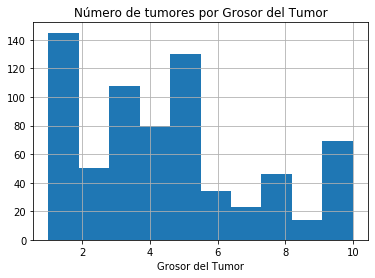

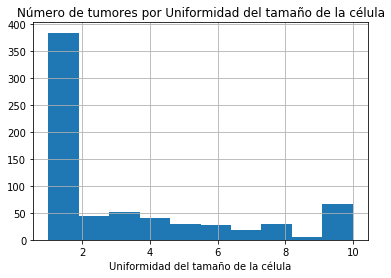

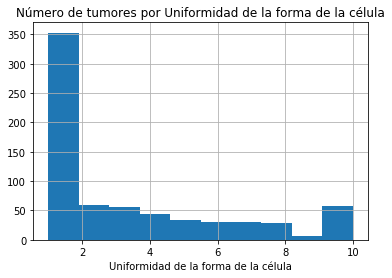

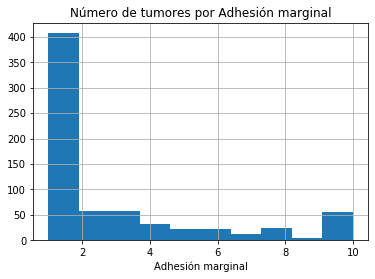

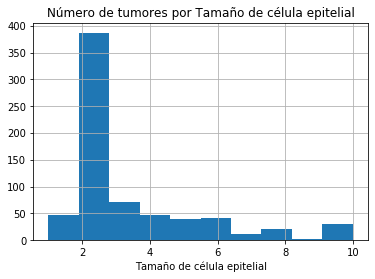

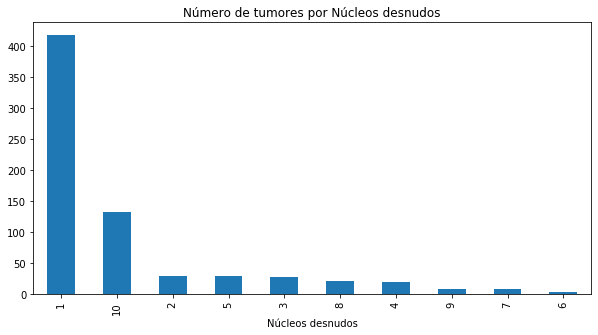

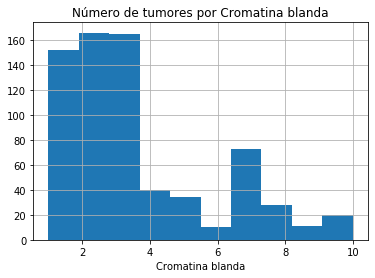

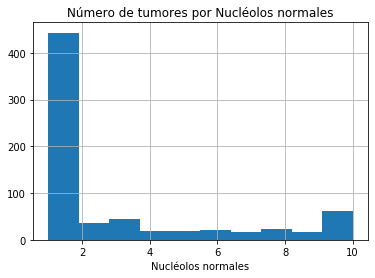

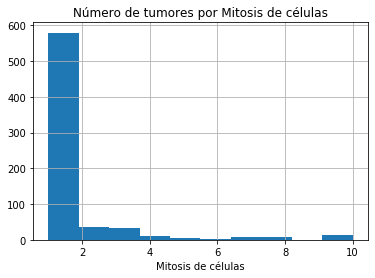

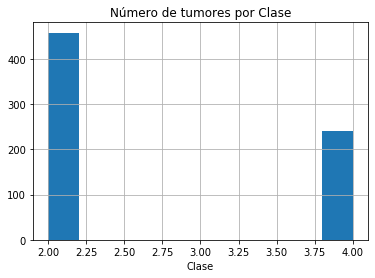

In [17]:
for col in df.columns:
    if df[col].dtype == np.object:
        print(col + ' is object')
        plt.figure()
        df[col].value_counts().plot(kind='bar', figsize=(10,5))
        plt.title("Número de tumores por " + col)
        plt.xlabel(col);
    else:
        plt.figure()
        df[col].hist()
        plt.title("Número de tumores por " + col)
        plt.xlabel(col);

In [18]:
df.dtypes

Grosor del Tumor                         int64
Uniformidad del tamaño de la célula      int64
Uniformidad de la forma de la célula     int64
Adhesión marginal                        int64
Tamaño de célula epitelial               int64
Núcleos desnudos                        object
Cromatina blanda                         int64
Nucléolos normales                       int64
Mitosis de células                       int64
Clase                                    int64
dtype: object

### Volvemos a separar los datos en entrenamiento, validación y prueba, esta vez incluyendo los registros que tenían datos faltantes

In [19]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=0)

### Volvemos a hacer las predicciones con los modelos entrenados anteriormente con el conjunto de datos sin los renglones con valores faltantes, esta vez con los datos completos y comparamos el rendimiento

In [20]:
y_pred_train = cat_nb.predict(X_train) 
print(y_pred_train)
print(f"Classification report for categorical (maximum likelihood) scikitlearn classifier on training data:\n"
      f"{metrics.classification_report(y_train, y_pred_train)}\n")
y_pred_val = cat_nb.predict(X_val) 
print(y_pred_val)
print(f"Classification report for categorical (maximum likelihood) scikitlearn classifier on validation data:\n"
      f"{metrics.classification_report(y_val, y_pred_val)}\n")

[2 4 2 2 4 2 2 4 2 2 2 2 2 2 2 2 4 2 4 4 4 2 2 4 2 4 2 2 2 2 2 4 2 4 2 4 2
 4 2 4 4 2 2 2 4 4 2 2 4 2 2 4 2 2 2 2 2 4 4 4 4 2 2 2 2 2 2 4 4 2 4 2 2 2
 2 4 2 2 2 4 2 4 2 2 4 4 4 4 2 4 2 4 2 2 2 4 4 4 4 2 2 2 2 4 4 4 2 2 2 2 2
 2 2 2 4 4 2 2 2 2 4 2 2 2 2 2 4 2 4 2 2 2 2 2 2 2 2 4 4 2 4 2 2 2 4 2 2 2
 2 2 2 4 2 4 2 2 2 2 2 2 4 4 2 4 2 2 2 2 2 4 2 2 4 2 2 2 2 2 2 2 2 2 2 4 2
 2 2 4 4 2 2 2 2 4 2 2 4 2 4 2 4 4 4 2 2 2 4 2 4 2 2 2 4 4 4 2 2 2 2 4 2 2
 4 4 2 2 2 2 4 2 2 2 2 4 4 4 2 2 2 2 2 2 4 2 2 2 2 2 2 4 2 2 4 4 2 2 2 2 2
 2 2 2 2 2 2 2 2 4 2 4 2 2 4 4 2 2 2 2 2 2 4 2 2 2 4 2 2 2 4 2 2 2 4 2 4 2
 4 2 2 2 2 2 4 2 2 4 2 4 4 4 2 2 4 2 2 2 2 2 2 2 2 4 2 4 4 4 2 4 2 2 4 4 4
 2 2 2 4 2 4 4 2 4 4 2 4 4 4 2 2 4 2 4 4 4 4 2 4 2 4 2 2 4 2 4 2 2 4 2 4 4
 4 4 2 4 4 2 4 2 4 2 4 2 2 4 2 2 2 2 2 2 2 2 4 4 2 4 4 2 2 4 2 4 2 2 2 4 4
 2 2 2 2 4 2 2 4 4 2 2 2]
Classification report for categorical (maximum likelihood) scikitlearn classifier on training data:
              precision    recall  f1-score   sup

In [21]:
y_pred_train = gauss_nb.predict(X_train) 
print(y_pred_train)
print(f"Classification report for gaussian (maximum likelihood) scikitlearn classifier on training data:\n"
      f"{metrics.classification_report(y_train, y_pred_train)}\n")
y_pred_val = gauss_nb.predict(X_val) 
print(y_pred_val)
print(f"Classification report for gaussian (maximum likelihood) scikitlearn classifier on validation data:\n"
      f"{metrics.classification_report(y_val, y_pred_val)}\n")

[2 4 2 2 4 2 2 4 2 2 2 2 2 2 2 2 4 2 4 4 4 2 2 4 2 4 2 2 2 2 2 4 2 4 2 4 2
 4 2 4 4 2 2 2 4 4 2 2 4 2 2 4 2 2 2 2 2 2 4 4 4 2 2 2 2 2 2 4 4 2 4 2 2 2
 2 4 2 2 2 4 2 4 2 2 4 4 4 4 4 4 2 4 2 2 2 4 4 4 4 2 2 2 2 4 4 2 2 2 2 2 2
 2 2 2 4 4 2 2 2 2 4 2 4 2 2 2 4 2 4 2 4 2 2 2 2 2 2 4 4 2 4 2 2 2 4 2 4 2
 2 2 2 4 2 4 2 2 2 2 2 2 4 4 2 4 2 2 2 2 2 4 2 2 4 2 2 2 2 2 2 2 2 2 2 4 2
 2 2 4 4 2 2 2 2 4 2 2 4 2 4 2 4 4 4 2 2 2 4 2 4 2 2 2 4 4 4 2 2 2 2 4 2 2
 4 4 2 2 2 2 4 2 2 2 2 4 4 4 2 2 2 2 2 2 4 2 2 2 2 2 2 4 2 2 4 4 2 2 2 2 2
 2 2 2 2 2 2 2 2 4 2 4 2 2 4 4 2 2 2 2 2 2 4 2 2 2 4 2 2 2 4 2 2 2 4 2 4 2
 4 2 2 2 2 2 4 2 2 4 2 4 4 4 2 2 4 2 2 2 2 2 2 2 2 4 2 4 4 4 2 4 2 2 4 4 4
 2 2 2 4 2 4 4 2 4 4 2 4 4 4 4 2 4 2 4 4 4 4 2 4 2 4 2 2 4 2 4 2 2 4 2 4 4
 4 4 2 4 4 2 4 2 4 2 4 2 2 4 2 2 2 2 2 2 2 2 4 4 2 4 4 2 2 4 2 4 2 2 2 4 4
 2 2 2 2 4 4 2 4 4 2 2 2]
Classification report for gaussian (maximum likelihood) scikitlearn classifier on training data:
              precision    recall  f1-score   suppor

In [22]:
y_pred_train = ber_nb.predict(X_train) 
print(y_pred_train)
print(f"Classification report for bernoulli (maximum likelihood) scikitlearn classifier on training data:\n"
      f"{metrics.classification_report(y_train, y_pred_train)}\n")
y_pred_val = ber_nb.predict(X_val) 
print(y_pred_val)
print(f"Classification report for bernoulli (maximum likelihood) scikitlearn classifier on validation data:\n"
      f"{metrics.classification_report(y_val, y_pred_val)}\n")

[2 2 2 2 4 2 2 4 2 2 2 2 2 2 2 2 4 2 4 4 4 2 2 2 2 2 2 2 2 2 2 4 2 4 2 4 2
 4 2 4 4 2 2 2 4 4 2 2 4 2 2 4 2 2 2 2 2 2 4 2 4 2 2 2 2 2 2 4 4 2 4 2 2 2
 2 4 2 2 2 2 2 4 2 2 4 4 4 4 2 4 2 4 2 2 2 4 4 4 4 2 2 2 2 4 4 2 2 2 2 2 2
 2 2 2 4 4 2 2 2 2 4 2 4 2 2 2 4 2 4 2 2 2 2 2 2 2 2 4 4 2 4 2 2 2 4 2 2 2
 2 2 2 4 2 4 2 2 2 2 2 2 4 4 2 4 2 2 2 2 2 4 2 2 4 2 2 2 2 2 2 2 2 2 2 4 2
 2 2 2 4 2 2 2 2 4 2 2 4 2 4 2 4 4 4 2 2 2 4 2 4 2 2 2 4 4 4 2 2 2 2 4 2 2
 4 4 2 2 2 2 4 2 2 2 2 4 4 2 2 2 2 2 2 2 4 2 2 2 2 2 2 4 2 2 4 4 2 2 2 2 2
 2 2 2 2 2 2 2 2 4 2 4 2 2 4 4 2 2 2 2 2 2 4 2 2 2 4 2 2 2 2 2 2 2 4 2 4 2
 4 2 2 2 2 2 4 2 2 4 2 4 4 4 2 2 4 2 2 2 2 2 2 2 2 4 2 4 4 4 2 4 2 2 4 4 4
 2 2 2 4 2 2 4 2 4 4 2 4 4 4 2 2 4 2 4 4 4 4 2 4 2 4 2 2 4 2 4 2 2 4 2 4 4
 4 2 2 4 4 2 2 2 4 2 4 2 2 4 2 2 2 2 2 2 2 2 4 4 2 4 4 2 2 4 2 4 2 2 2 4 4
 2 2 2 2 4 2 2 4 4 2 2 2]
Classification report for bernoulli (maximum likelihood) scikitlearn classifier on training data:
              precision    recall  f1-score   suppo

In [23]:
y_pred_train = multi_nb.predict(X_train) 
print(y_pred_train)
print(f"Classification report for multinomial (maximum likelihood) scikitlearn classifier on training data:\n"
      f"{metrics.classification_report(y_train, y_pred_train)}\n")
y_pred_val = multi_nb.predict(X_val) 
print(y_pred_val)
print(f"Classification report for multinomial (maximum likelihood) scikitlearn classifier on validation data:\n"
      f"{metrics.classification_report(y_val, y_pred_val)}\n")

[2 2 2 2 4 2 2 4 2 2 2 2 2 2 2 2 4 2 4 4 2 2 2 2 2 4 2 2 2 2 2 4 2 4 4 4 2
 4 2 4 4 2 2 2 4 4 2 2 4 2 2 2 2 2 2 2 2 2 4 4 4 2 2 2 2 2 2 4 4 2 4 2 2 2
 2 4 2 2 2 2 2 4 2 2 4 4 4 4 4 4 2 2 2 2 2 2 4 4 4 2 2 2 2 4 4 2 2 2 2 2 2
 2 2 2 4 4 2 2 2 2 4 2 4 2 2 2 4 2 4 2 2 2 2 2 2 2 2 4 2 2 4 2 2 2 4 4 2 2
 2 2 2 4 4 4 2 2 2 2 2 2 2 4 2 4 2 2 2 2 2 4 2 2 4 2 2 2 4 2 2 2 2 2 2 2 2
 2 2 2 4 2 2 2 2 4 2 2 4 2 4 2 4 4 4 2 2 2 4 2 4 2 2 2 4 4 4 2 2 2 2 4 2 2
 4 4 2 2 2 2 4 2 2 2 2 4 4 4 2 2 2 2 2 2 4 2 2 2 2 2 2 4 2 2 4 4 2 2 2 2 2
 2 2 2 2 2 2 2 2 4 2 4 2 2 2 2 2 2 2 2 2 2 4 2 2 2 2 2 2 2 4 2 2 2 4 4 4 2
 2 2 2 2 2 2 4 2 2 2 2 4 4 2 2 2 4 2 2 2 2 2 2 2 2 4 2 4 4 4 2 4 2 2 2 4 4
 2 2 2 4 2 2 2 2 4 2 2 4 4 4 4 2 4 2 4 4 2 4 2 4 2 4 2 2 4 2 4 2 2 4 2 4 4
 4 4 2 4 4 2 4 2 4 2 4 2 2 4 2 2 2 4 2 2 2 2 4 4 2 4 2 2 2 4 2 4 2 2 2 4 4
 4 2 2 2 4 2 2 4 4 4 2 2]
Classification report for multinomial (maximum likelihood) scikitlearn classifier on training data:
              precision    recall  f1-score   sup

### No hay un impacto visible en el rendimiento de los modelos al incluir los 16 registros que faltaban, probablemente esto sea porque este número de registros es una porción demasiado pequeña y por ende poco significativa como para poder impactar al modelo.

### Lo anterior se soporta aún más con el rendimiento en el conjunto de prueba del modelo con mejor rendimiento, en este caso, el categórico. Como se puede ver, ante un conjunto mucho más grande de datos que no ha visto el modelo, el rendimiento si disminuye, tan sólo un 1%, sin embargo, si refleja una reducción proporcional de la cantidad de predicciones correctas.

In [24]:
y_pred_test = gauss_nb.predict(X_test) 
print(y_pred_test)
print(f"Classification report for categorical (maximum likelihood) scikitlearn classifier on test data:\n"
      f"{metrics.classification_report(y_test, y_pred_test)}\n")

[2 2 4 2 4 2 4 2 4 4 2 2 4 4 4 2 2 4 4 2 4 4 2 2 2 4 2 2 4 4 2 2 2 2 2 4 2
 4 2 2 2 2 2 2 4 4 2 4 2 4 4 2 2 4 2 2 2 2 2 2 4 2 2 4 4 4 4 2 2 4 2 2 4 4
 2 2 2 2 4 2 2 2 4 2 2 2 4 2 4 4 2 2 4 4 2 2 2 4 2 4 4 2 2 2 4 2 2 2 2 2 4
 4 4 2 2 2 2 2 4 4 4 4 2 4 2 2 4 4 4 4 4 2 2 4 4 2 2 4 2 2]
Classification report for categorical (maximum likelihood) scikitlearn classifier on test data:
              precision    recall  f1-score   support

           2       0.99      0.95      0.97        85
           4       0.93      0.98      0.96        55

    accuracy                           0.96       140
   macro avg       0.96      0.97      0.96       140
weighted avg       0.97      0.96      0.96       140


